## 1 Load the dataset :
**sample rate** how much time per seconds an audio is sampled,if the signal had a sample rate of 10 Hz and was a five-second sine wave, then it would have 10 * 5 = 50 data points.

In [17]:
import os
import librosa
import pandas as pd
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
audio_dir = 'C:\\Users\\elham\\Desktop\\dataset\\'
files=os.listdir(audio_dir)
file_names = []
durations = []
sample_rates = []

for file in files:
    file_path = os.path.join(audio_dir, file)
    y, sr = librosa.load(file_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    file_names.append(file)
    durations.append(duration)
    sample_rates.append(sr)

audio_df = pd.DataFrame({
    'file': file_names,
    'duration': durations,
    'sample_rate': sample_rates
})
audio_df.head()

,file,duration,sample_rate
0,common_voice_en_40865212.mp3,5.544,32000
1,common_voice_en_40865213.mp3,5.760,32000
2,common_voice_en_40865214.mp3,5.652,32000
3,common_voice_en_40865215.mp3,6.120,32000
4,common_voice_en_40865221.mp3,7.920,32000


##  2 Visualization 

In [18]:
import IPython.display as ipd
audio1='C:\\Users\\elham\\Desktop\\step\\voice.mp3'
audio2='C:\\Users\\elham\\Desktop\\step\\voice2.mp3'

ipd.Audio(audio1)


In [15]:
ipd.Audio(audio2)

In [20]:
y1,sr1=librosa.load(audio1,sr=None)
y2,sr2=librosa.load(audio2,sr=None)


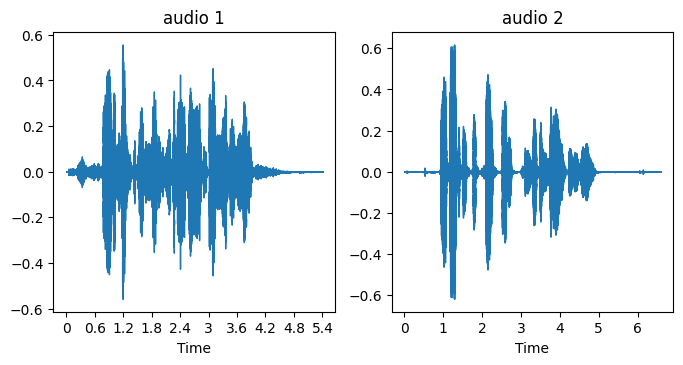

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
librosa.display.waveshow(y=y1,sr=sr1)
plt.title('audio 1')
plt.subplot(2,2,2 )
librosa.display.waveshow(y=y2,sr=sr2)
plt.title('audio 2')
plt.show()
          

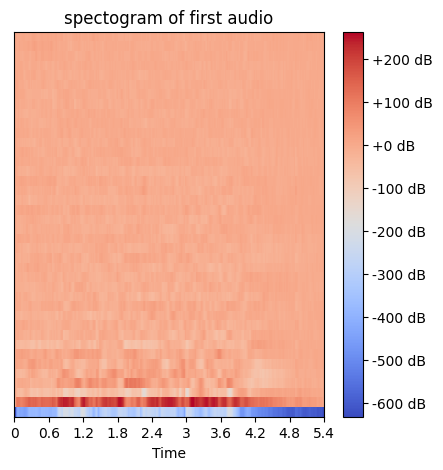

In [22]:
mfcc1=librosa.feature.mfcc(y=y1, sr=sr1,n_mfcc=40)
plt.figure(figsize=(5,5))
librosa.display.specshow(data=mfcc1,sr=sr,x_axis='time')
plt.title('spectogram of first audio')

plt.colorbar(format='%+2.0f dB')
plt.show()

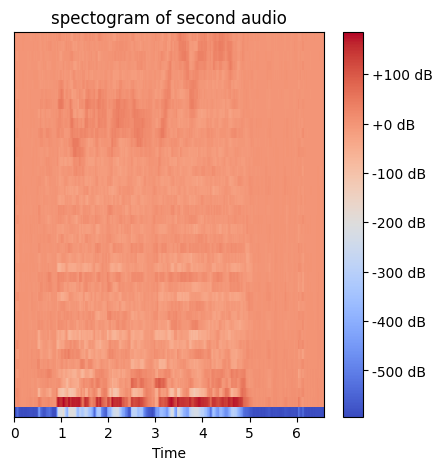

In [23]:
mfcc2=librosa.feature.mfcc(y=y2, sr=sr2,n_mfcc=40)
plt.figure(figsize=(5,5))
librosa.display.specshow(data=mfcc2,sr=sr2,x_axis='time')
plt.title('spectogram of second audio')

plt.colorbar(format='%+2.0f dB')
plt.show()

### 3 filter an audio: 
#### a) load the audio file
#### b) perform fft
**FFT** is an algorith compute **DFT**\
**THE DFT MATRIX FORM**
$$ {X} =
	\begin{pmatrix}
		1 & 1 & 1 & \dots & 1 \\
		1 & W & W^2 & \dots & W^{N-1} \\
		1 & W^2 & W^4 & \dots & W^{2(N-1)} \\
		\vdots & \vdots & \vdots & \ddots & \vdots \\
		1 & W^{N-1} & W^{2(N-1)} & \dots & W^{(N-1)(N-1)}
	\end{pmatrix}
	\begin{pmatrix}
		x[0] \\
		x[1] \\
		x[2] \\
		\vdots \\
		x[N-1]
	\end{pmatrix}$$\
     $( W = e^{-i \frac{2 \pi}{N}} $\) is the primitive root of unity. Each row of the matrix corresponds to successive powers of \( W \).

#### c) design rectangular filter LPF
**LPF** frequencies below cutoff will pass while frequencies above the cutoff frequency will  attenuat.\
used for :\
**noise reduction**\
**data compression**
##### a rectanular window given by:$$ w(n)=
\begin{cases}
1 & \text{for} \quad 0 \leq n \leq N-1,\\
0 & \text{otherwise}
\end{cases}
$$
$N$ length of the window.

#### d) perform inverse fft and take real value: back to time domain



In [24]:
import numpy as np
from scipy.io.wavfile import write
y,sr=librosa.load(audio1,sr=None)
fft=np.fft.fft(y)
N=len(y)
freq=np.fft.fftfreq(N,1/sr)
cutoff=500
lpf=np.abs(freq)<=cutoff
filtred=fft*lpf
res=np.real(np.fft.ifft(filtred))
scaled=np.int16(res*32767)
write('res.wav',sr,scaled)

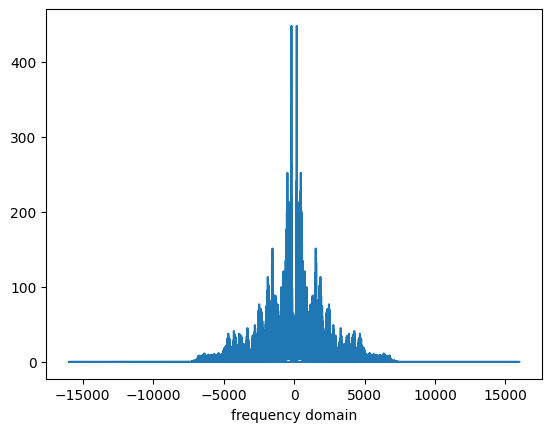

In [25]:
magnitude=np.abs(fft)
plt.plot(freq,magnitude)
plt.xlabel('frequency domain')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabl'

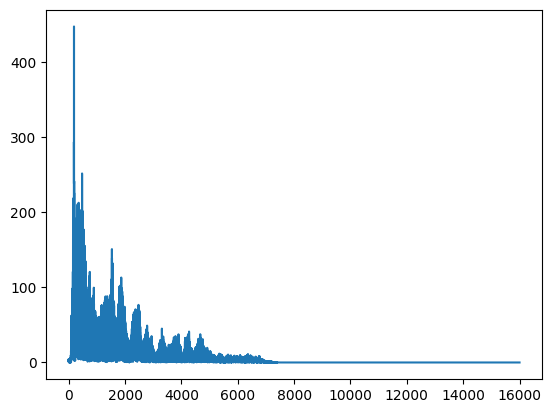

In [26]:
plt.plot(freq[:len(freq)//2],np.abs(fft)[:len(freq)//2])
plt.xlabl('frquency domain')
plt.show()

# MFCC:
## 1 The Short-Time Fourier Transform (STFT)
**The Short-Time Fourier Transform (STFT)** is applying the Discrete Fourier Transform (DFT) to each frame,so we can track the evolution of the frequency spectrum over time. 

### 1.1  DFT: we use fft algoritm to compute dft

 #### STFT is appling DFT at each frame , where rows are frequencies and columns are frames 
**rows** are frequencies  and **columns** are frames.

 
$$ {X} =
	\begin{pmatrix}
		X_{1,1} & X_{1,2} & X_{1,3} & \dots & X_{1,t} \\
		X_{2,1} & X_{2,2} & X_{2,3} & \dots & X_{2,t} \\
		X_{3,1} & X_{3,2} & X_{3,3} & \dots & X_{3,t} \\
		\vdots & \vdots & \vdots & \ddots & \vdots \\
		X_{f,1} & X_{f,2} & X_{f,3} & \dots & X_{f,t}
	\end{pmatrix}$$
  ### 1.2 windows :
#### 1 hamming window :
$$w(n) = 0.54 - 0.46 \cdot \cos \left( \frac{2 \pi n}{N-1} \right)$$
#### 2 rectangular window:
$$ w(n)=
\begin{cases}
1 & \text{for} \quad 0 \leq n \leq N-1,\\
0 & \text{otherwise}
\end{cases}
$$
## 2 mel scale : the way human perceive sounds , 
### 2.1 mel : expand low frequencies and compress high frequencies :
$$m = 1127 \cdot \ln \left( 1 + \frac{f}{700} \right)$$
### 2.2 matrix form of triangular filter:
**rows** are filters and **columns** are frquencies.
$$ {H} =
	\begin{pmatrix}
		H_{1,1} & H_{1,2} & H_{1,3} & \dots & H_{1,n} \\
		H_{2,1} & H_{2,2} & H_{2,3} & \dots & H_{2,n} \\
		H_{3,1} & X_{3,2} & H_{3,3} & \dots & H_{3,n} \\
		\vdots & \vdots & \vdots & \ddots & \vdots \\
		H_{m,1} & H_{m,2} & H_{m,3} & \dots & H_{m,n}
	\end{pmatrix}$$
**lower part of triangle** $f_n$ between $f_{m-1} $ and $f_m$ :  $$h_{m,n}=\frac{f_n-f_{m-1}}{f_m-f_{m-1}}$$
**upper part of triangle**  $f_n$ between $f_m$ and $f_{m+1}$: $$h_{m,n}=\frac{f_{m+1}-f_n}{f_{m+1}-f_m} $$ 

       
## 3 apply log 

$$E_m=log(|X|*H)$$
## 4 apply DCT:
$$c_n = \sum_{m=0}^{M-1} E_m \cdot \cos \left( \frac{\pi n}{M} \cdot (m + 0.5) \right)$$

#### mfcc step by step

In [27]:
n_fft=2048#window size
hop_length=512
stft=librosa.stft(y1,n_fft=n_fft,hop_length=hop_length)
magnitude,phase=librosa.magphase(stft)

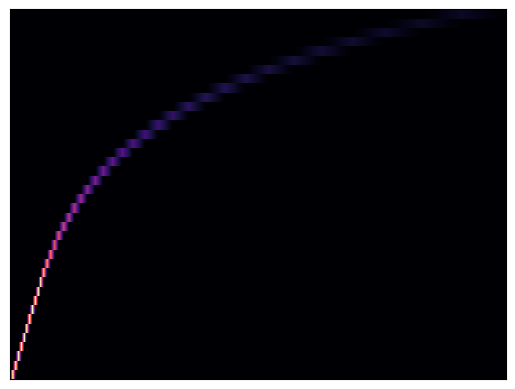

In [28]:
n_mels=40
mel_banks=librosa.filters.mel(sr=sr,n_mels=n_mels,n_fft=n_fft)
librosa.display.specshow(data=mel_banks,sr=sr1)

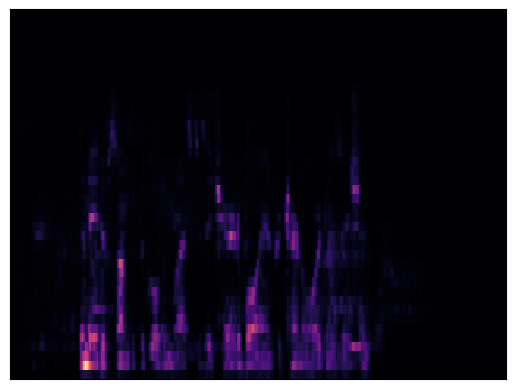

In [29]:
mel_spectogram=np.dot(mel_banks,magnitude)
librosa.display.specshow(data=mel_spectogram,sr=sr1)


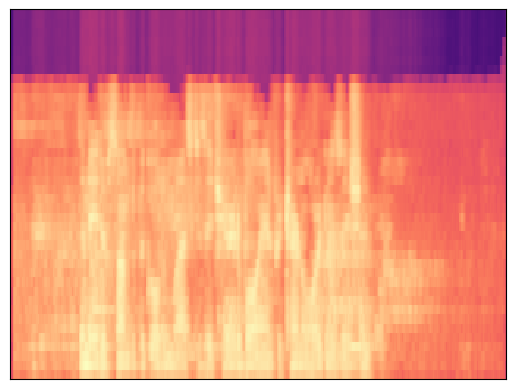

In [30]:
log_mel_spectogram=np.log(mel_spectogram)
librosa.display.specshow(data=log_mel_spectogram,sr=sr1)


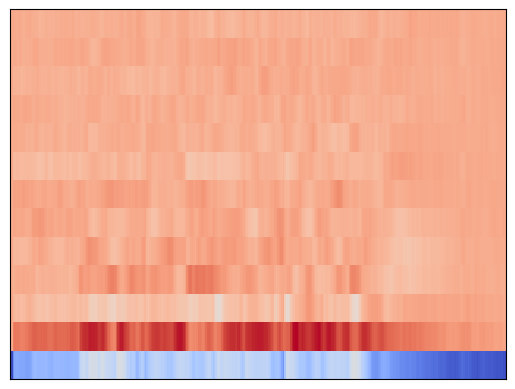

In [31]:
mfcc_data=librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)
librosa.display.specshow(data=mfcc_data,sr=sr1)

In [32]:
mfcc_data.shape

(13, 338)

## In general:

In [15]:
f=[]

for file in os.listdir(audio_dir):
    path=os.path.join(audio_dir,file)
    y,sr=librosa.load(path,sr=None)
    mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)
    mfcc_scaled=np.mean(mfcc.T,axis=0)
    f.append([mfcc_scaled])
df=pd.DataFrame(f,columns=['mfcc'])
df.head()



,mfcc
0,"[-436.95154, 111.86918, -5.737623, 10.835856, ..."
1,"[-463.68698, 96.023636, 10.858065, 12.7504015,..."
2,"[-475.33002, 116.23421, -2.4442587, 9.334161, ..."
3,"[-448.9377, 103.62063, 8.184104, 11.463086, -1..."
4,"[-443.1542, 121.67537, 2.2557526, 5.420878, -1..."
